Xarray practice following these guides:

https://earth-env-data-science.github.io/assignments/basic_xarray.html
https://github.com/yiqioyang/LEAP_Bootcamp_summer_2025/blob/main/assignment/basic_xarray.ipynb 

In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import gcsfs

In [2]:
plt.rcParams['figure.figsize'] = (12, 6)
%config InlineBackend.figure_format = 'retina'

In [3]:
fs = gcsfs.GCSFileSystem()
# fs.ls('leap-persistent/yiqioyang/')

In [4]:
mapper = fs.get_mapper("gs://leap-persistent/yiqioyang/CERES_EBAF-TOA_Ed4.2_Subset_200003-202407.nc")
ds = xr.open_dataset(mapper, engine='zarr')

In [5]:
# ds.solar_mon.attrs
ds

<xarray.Dataset> Size: 532MB
Dimensions:            (time: 293, lat: 180, lon: 360)
Coordinates:
  * time               (time) datetime64[ns] 2kB 2000-03-15 ... 2024-07-15
  * lat                (lat) float32 720B -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon                (lon) float32 1kB 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
Data variables:
    solar_mon          (time, lat, lon) float32 76MB ...
    toa_lw_all_mon     (time, lat, lon) float32 76MB ...
    toa_lw_clr_c_mon   (time, lat, lon) float32 76MB ...
    toa_net_all_mon    (time, lat, lon) float32 76MB ...
    toa_net_clr_c_mon  (time, lat, lon) float32 76MB ...
    toa_sw_all_mon     (time, lat, lon) float32 76MB ...
    toa_sw_clr_c_mon   (time, lat, lon) float32 76MB ...
Attributes:
    Conventions:  CF-1.4
    DOI:          10.5067/TERRA-AQUA-NOAA20/CERES/EBAF-TOA_L3B004.2
    comment:      Climatology from 07/2005 to 06/2015
    institution:  NASA/LaRC (Langley Research Center) Hampton, Va
    title:        CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Monthly...
    version:      Edition 4.2; Release Date December 9, 2022

In [6]:
# 2.1) Calculate the time-mean of the entire dataset

solar_mon_mean = ds.solar_mon.mean(dim = 'time')
toa_lw_all_mon_mean = ds.toa_lw_all_mon.mean(dim = 'time')
toa_net_all_mon_mean = ds.toa_net_all_mon.mean(dim = 'time')
toa_sw_all_mon_mean = ds.toa_sw_all_mon.mean(dim = 'time')

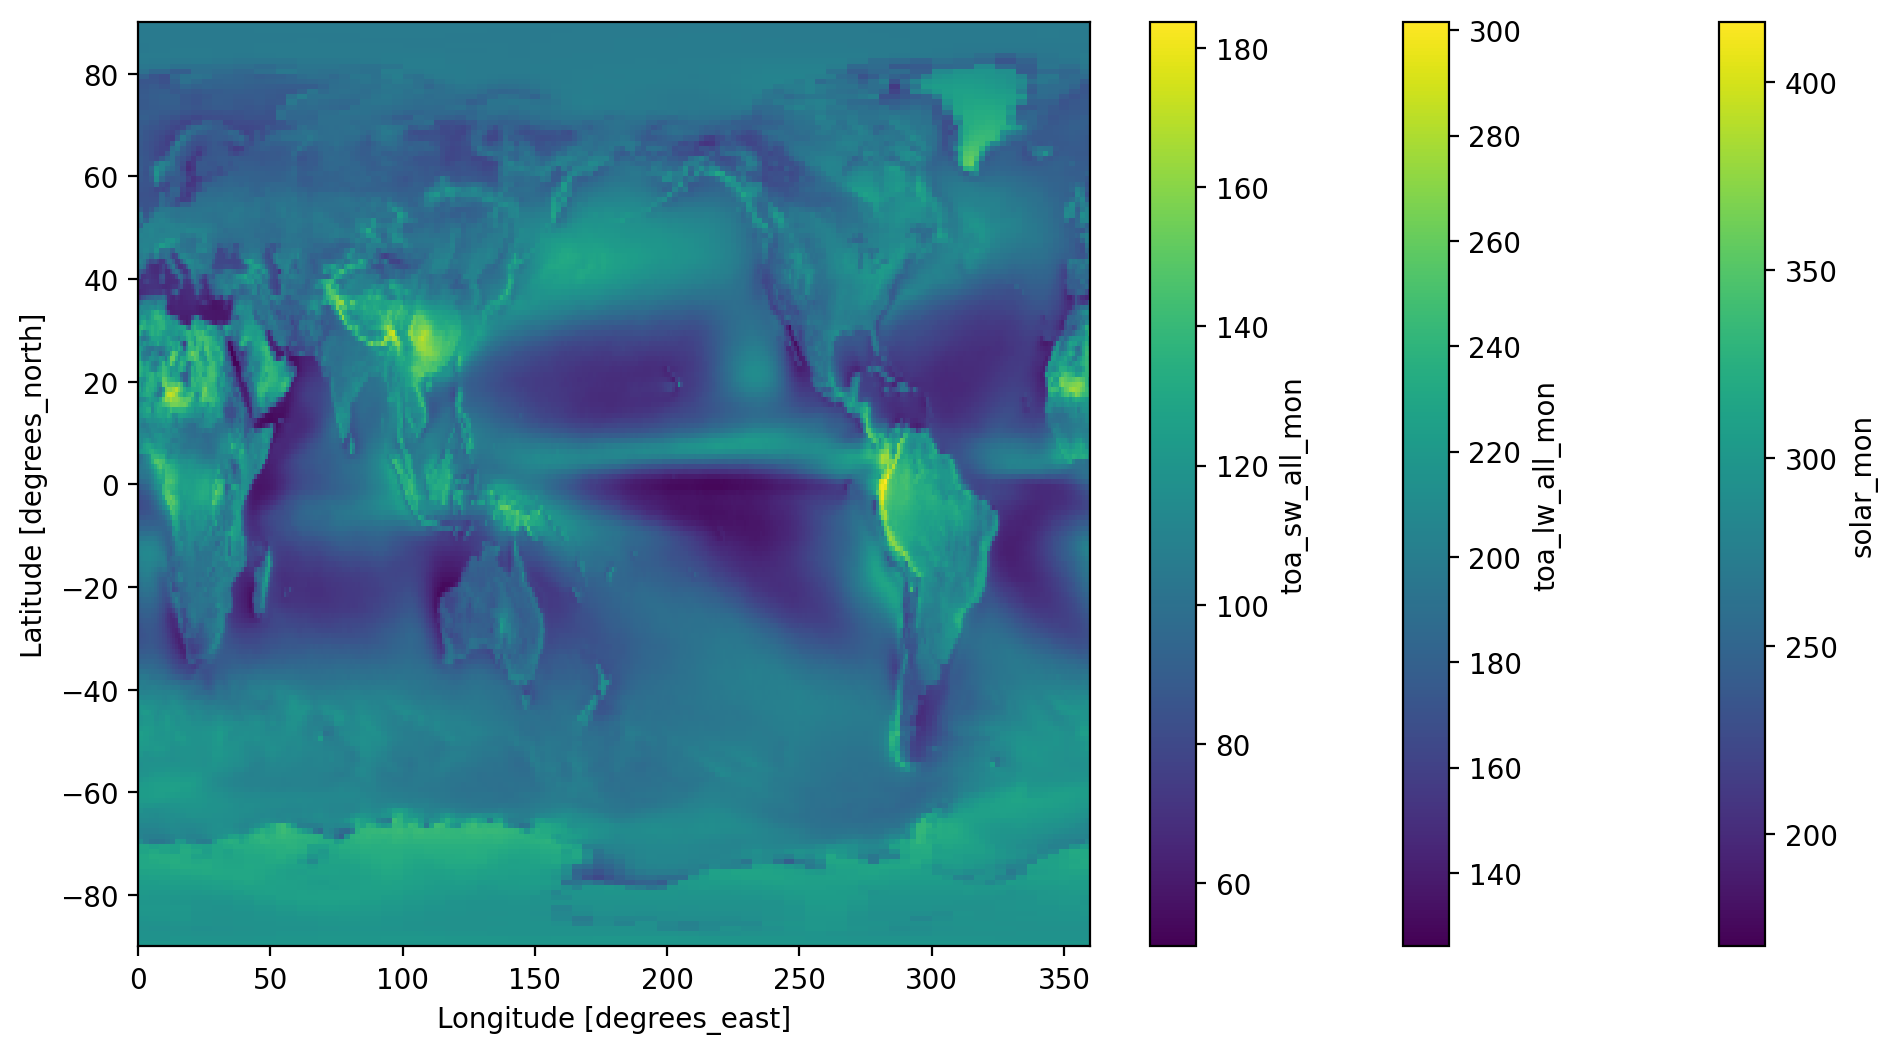

In [7]:
# 2.2) From this, make a 2D plot of the the time-mean Top of Atmosphere (TOA) Longwave, Shortwave, and Incoming Solar Radiation

solar_mon_mean.plot()
toa_lw_all_mon_mean.plot()
toa_sw_all_mon_mean.plot()

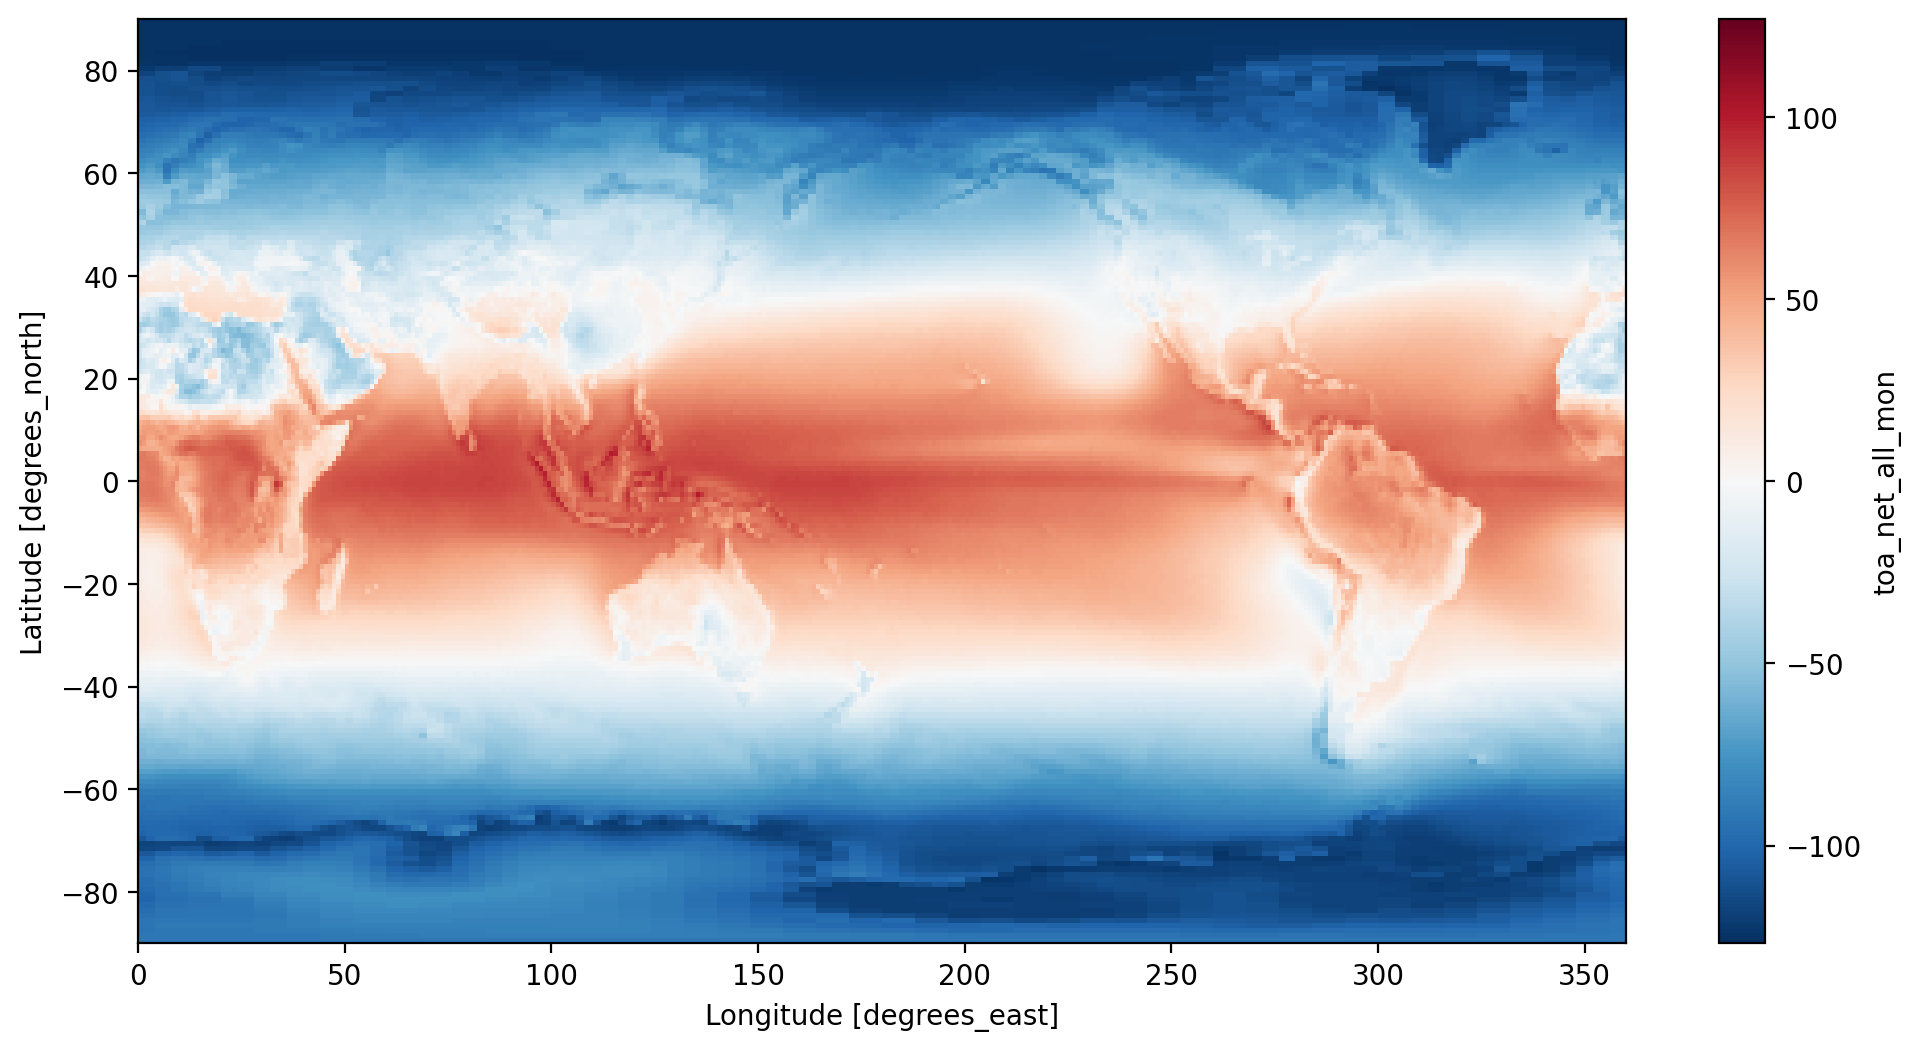

In [8]:
toa_net_all_mon_mean.plot()

In [9]:
# 2.3) Add up the three variables above and verify (visually) that they are equivalent to the TOA net flux

solar_mon_mean # incoming
toa_lw_all_mon_mean # outgoing
toa_sw_all_mon_mean # outgoing

total = solar_mon_mean - (toa_lw_all_mon_mean + toa_sw_all_mon_mean)
total

net = toa_net_all_mon_mean
net

comparing = total - net
comparing 
# result is array of very small numbers, indicating that the sum of the time-means of each variable
# is very similar but not exactly the same as the net time-mean (see plot below) 

<xarray.DataArray (lat: 180, lon: 360)> Size: 259kB
array([[ 0.0001297 ,  0.0001297 ,  0.0001297 , ...,  0.0001297 ,
         0.0001297 ,  0.0001297 ],
       [ 0.00046539,  0.00046539,  0.00046539, ...,  0.00046539,
         0.00046539,  0.00046539],
       [ 0.00205994,  0.00205994,  0.00205994, ...,  0.00205994,
         0.00205994,  0.00205994],
       ...,
       [-0.00326538, -0.00326538, -0.00326538, ..., -0.00326538,
        -0.00326538, -0.00326538],
       [-0.00375366, -0.00375366, -0.00375366, ..., -0.00375366,
        -0.00375366, -0.00375366],
       [ 0.00174713,  0.00174713,  0.00174713, ...,  0.00174713,
         0.00174713,  0.00174713]], shape=(180, 360), dtype=float32)
Coordinates:
  * lat      (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5

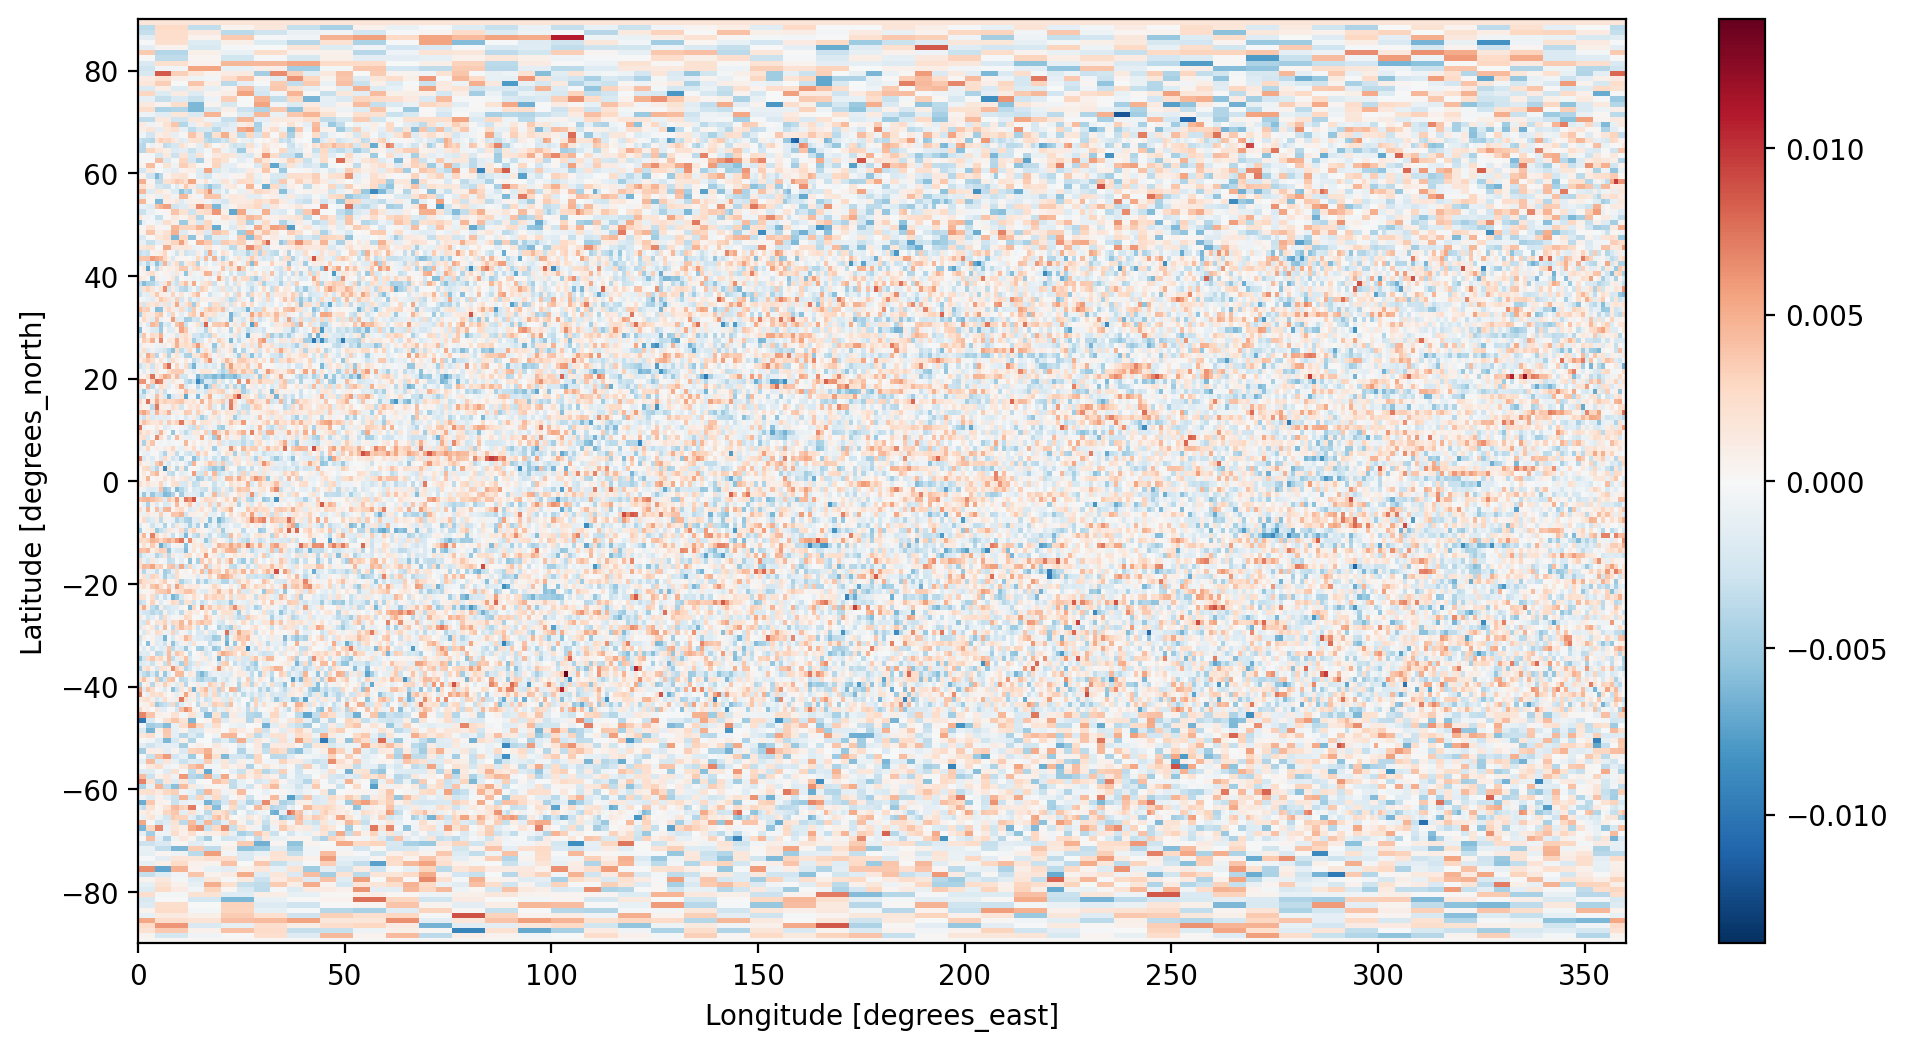

In [10]:
comparing.plot()

In [11]:
# 3.1) Calculate the global (unweighted) mean of TOA net radiation

ds.toa_net_all_mon.mean()

<xarray.DataArray 'toa_net_all_mon' ()> Size: 4B
array(-28.610788, dtype=float32)

In [12]:
# 3.2) Create a weight array proportional to cos(lambda)

weights = np.cos(np.deg2rad(ds.lat))
weights

<xarray.DataArray 'lat' (lat: 180)> Size: 720B
array([0.00872656, 0.02617699, 0.04361945, 0.06104851, 0.07845908,
       0.09584576, 0.11320324, 0.13052624, 0.14780948, 0.16504757,
       0.18223551, 0.19936794, 0.21643965, 0.23344542, 0.25037998,
       0.26723838, 0.28401536, 0.30070582, 0.3173047 , 0.33380693,
       0.35020736, 0.3665012 , 0.38268346, 0.3987491 , 0.4146933 ,
       0.43051115, 0.44619778, 0.4617486 , 0.47715878, 0.49242356,
       0.5075384 , 0.5224986 , 0.5372996 , 0.551937  , 0.56640625,
       0.58070296, 0.59482276, 0.6087614 , 0.62251467, 0.6360782 ,
       0.64944804, 0.66262007, 0.67559016, 0.68835455, 0.70090926,
       0.71325046, 0.72537434, 0.7372773 , 0.7489557 , 0.76040596,
       0.77162457, 0.78260815, 0.7933533 , 0.8038569 , 0.8141155 ,
       0.8241262 , 0.83388585, 0.8433914 , 0.85264015, 0.8616291 ,
       0.87035567, 0.87881714, 0.8870108 , 0.89493436, 0.90258527,
       0.9099613 , 0.9170601 , 0.9238795 , 0.9304176 , 0.9366722 ,
       0.9426415 , 0.94832367, 0.95371693, 0.95881975, 0.96363044,
       0.96814764, 0.9723699 , 0.976296  , 0.9799247 , 0.9832549 ,
       0.9862856 , 0.9890159 , 0.9914449 , 0.9935719 , 0.9953962 ,
       0.9969173 , 0.9981348 , 0.99904823, 0.99965733, 0.9999619 ,
       0.9999619 , 0.99965733, 0.99904823, 0.9981348 , 0.9969173 ,
       0.9953962 , 0.9935719 , 0.9914449 , 0.9890159 , 0.9862856 ,
       0.9832549 , 0.9799247 , 0.976296  , 0.9723699 , 0.96814764,
       0.96363044, 0.95881975, 0.95371693, 0.94832367, 0.9426415 ,
       0.9366722 , 0.9304176 , 0.9238795 , 0.9170601 , 0.9099613 ,
       0.90258527, 0.89493436, 0.8870108 , 0.87881714, 0.87035567,
       0.8616291 , 0.85264015, 0.8433914 , 0.83388585, 0.8241262 ,
       0.8141155 , 0.8038569 , 0.7933533 , 0.78260815, 0.77162457,
       0.76040596, 0.7489557 , 0.7372773 , 0.72537434, 0.71325046,
       0.70090926, 0.68835455, 0.67559016, 0.66262007, 0.64944804,
       0.6360782 , 0.62251467, 0.6087614 , 0.59482276, 0.58070296,
       0.56640625, 0.551937  , 0.5372996 , 0.5224986 , 0.5075384 ,
       0.49242356, 0.47715878, 0.4617486 , 0.44619778, 0.43051115,
       0.4146933 , 0.3987491 , 0.38268346, 0.3665012 , 0.35020736,
       0.33380693, 0.3173047 , 0.30070582, 0.28401536, 0.26723838,
       0.25037998, 0.23344542, 0.21643965, 0.19936794, 0.18223551,
       0.16504757, 0.14780948, 0.13052624, 0.11320324, 0.09584576,
       0.07845908, 0.06104851, 0.04361945, 0.02617699, 0.00872656],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Attributes:
    long_name:      Latitude
    standard_name:  latitude
    units:          degrees_north
    valid_range:    [-90.0, 90.0]

In [13]:
# 3.3) Redo your global mean TOA net radiation calculation with this weight factor

weighted_net_mean = ds.toa_net_all_mon.weighted(weights).mean()
weighted_net_mean

<xarray.DataArray 'toa_net_all_mon' ()> Size: 4B
array(1.0112827, dtype=float32)

In [14]:
# 3.4) Now that you have a weight factor, verify that the TOA incoming solar, outgoing longwave, and outgoing shortwave approximately match up with infographic shown in the first cell of this assignment

ds.solar_mon.weighted(weights).mean() # 340.4
ds.toa_lw_all_mon.weighted(weights).mean() # 240.5
ds.toa_sw_all_mon.weighted(weights).mean() # 98.8

<xarray.DataArray 'toa_sw_all_mon' ()> Size: 4B
array(98.87905, dtype=float32)